## Observations and Insights 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice.
print('The number of mice in the mouse metadata set is:',len(mouse_metadata['Mouse ID'].unique()))
print('The number of mice in the study results data set is:',len(study_results['Mouse ID'].unique()))
print('The number of mice in the combined data set is:',len(study_data['Mouse ID'].unique()))

The number of mice in the mouse metadata set is: 249
The number of mice in the study results data set is: 249
The number of mice in the combined data set is: 249


In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Select all duplicate rows based on multiple column names 
duplicate_rows = study_data[study_data.duplicated(['Mouse ID','Timepoint'])]
duplicate_mice = duplicate_rows['Mouse ID'].unique()
print('The number of mice with duplicate Timepoint data is:',len(duplicate_mice))
print('The Mouse ID with duplicate Timepoint data is:',duplicate_mice[0])

The number of mice with duplicate Timepoint data is: 1
The Mouse ID with duplicate Timepoint data is: g989


In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data[study_data['Mouse ID'] == duplicate_mice[0]]
print('The number of rows to be removed is:',len(duplicate_mouse_data))
print('All of the data for the Mouse ID with duplicate Timepoint values is:\n')
duplicate_mouse_data

The number of rows to be removed is: 13
All of the data for the Mouse ID with duplicate Timepoint values is:



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Display the number of mice in the original DataFrame.
print('The length of the Original Data Frame is:',len(study_data))
print('The number of mice in the Original Data Frame is:',len(study_data['Mouse ID'].unique()))

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = study_data[study_data['Mouse ID'] != duplicate_mice[0]]

The length of the Original Data Frame is: 1893
The number of mice in the Original Data Frame is: 249


In [19]:
# Checking the number of mice in the clean DataFrame.
print('The length of the Clean Data Frame is:',len(cleaned_data))
print('The number of mice in the Clean Data Frame is:',len(cleaned_data['Mouse ID'].unique()))

The length of the Clean Data Frame is: 1880
The number of mice in the Clean Data Frame is: 248


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_data = pd.DataFrame(cleaned_data[['Drug Regimen','Tumor Volume (mm3)']])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = regimen_data.groupby(['Drug Regimen']).mean()
tumor_mean = tumor_mean.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})
tumor_median = regimen_data.groupby(['Drug Regimen']).median()
tumor_median = tumor_median.rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume'})
tumor_variance = regimen_data.groupby(['Drug Regimen']).var()
tumor_variance = tumor_variance.rename(columns={'Tumor Volume (mm3)': 'Variance of Tumor Volume'})
tumor_stdDev = regimen_data.groupby(['Drug Regimen']).std()
tumor_stdDev = tumor_stdDev.rename(columns={'Tumor Volume (mm3)': 'Standard Deveiation of Tumor Volume'})
tumor_SEM = regimen_data.groupby(['Drug Regimen']).sem()
tumor_SEM = tumor_SEM.rename(columns={'Tumor Volume (mm3)': 'Standard Error of Mean Tumor Volume'})

# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.merge(tumor_mean,tumor_median, on='Drug Regimen')
summary_stats = pd.merge(summary_stats,tumor_variance, on='Drug Regimen')
summary_stats = pd.merge(summary_stats,tumor_stdDev, on='Drug Regimen')
summary_stats = pd.merge(summary_stats,tumor_SEM, on='Drug Regimen')

# Display the summary dataframe
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deveiation of Tumor Volume,Standard Error of Mean Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_agg = pd.DataFrame(cleaned_data[['Drug Regimen','Tumor Volume (mm3)','Tumor Volume (mm3)','Tumor Volume (mm3)','Tumor Volume (mm3)','Tumor Volume (mm3)']])
regimen_agg.columns = ['Drug Regimen','Mean','Median', 'Variance', 'Standard Deviation', 'SEM']

# Using the aggregation method, produce the same summary statistics in a single line
regimen_agg = regimen_agg.groupby('Drug Regimen').agg({'Mean':'mean', 'Median':'median', 'Variance':'var','Standard Deviation':'std','SEM':'sem'})

# Display the summary dataframe
regimen_agg

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

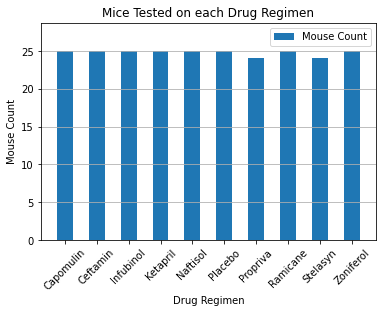

In [54]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen_mice = pd.DataFrame(cleaned_data[['Drug Regimen','Mouse ID','Sex']])
regimen_mice['Mouse ID'] = regimen_mice['Mouse ID'].drop_duplicates()
regimen_mice = regimen_mice.dropna(how='any')
mouse_count = regimen_mice.groupby(['Drug Regimen']).count().rename(columns={'Mouse ID': 'Mouse Count'}).reset_index()
del mouse_count['Sex']
mouse_count.plot(kind="bar")
plt.title("Mice Tested on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
regimens = mouse_count['Drug Regimen'].unique()
x_axis = np.arange(len(mouse_count))
plt.xticks([value for value in x_axis], regimens, rotation=45)
plt.xlim(-0.75, len(mouse_count)-.25)
plt.ylim(0, max(mouse_count['Mouse Count']) * 1.15)
plt.grid(axis='y')
plt.show()

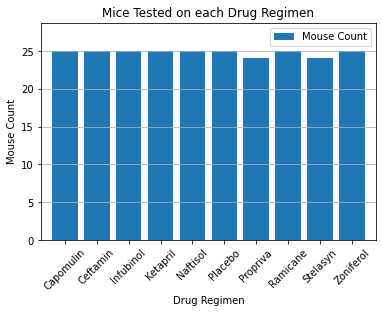

In [42]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(x_axis, mouse_count['Mouse Count'], align='center', label='Mouse Count')
plt.title('Mice Tested on each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse Count')
regimens = mouse_count['Drug Regimen'].unique()
x_axis = np.arange(len(mouse_count))
plt.xticks([value for value in x_axis], regimens, rotation=45)
plt.xlim(-0.75, len(mouse_count)-.25)
plt.ylim(0, max(mouse_count['Mouse Count']) * 1.15)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.show()

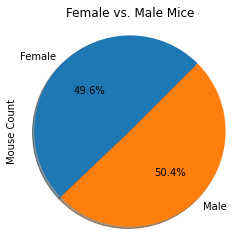

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice = regimen_mice.groupby(['Sex']).count().rename(columns={'Mouse ID': 'Mouse Count'}).reset_index()
del gender_mice['Drug Regimen']
gender_mice
gender_mice['Mouse Count'].plot(kind='pie', labels=gender_mice['Sex'], autopct="%1.1f%%", shadow=True, startangle=45, radius=1.1)
plt.title('Female vs. Male Mice')
plt.show()

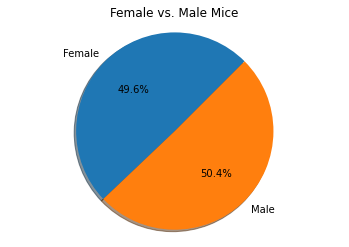

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_mice['Mouse Count'], labels=gender_mice['Sex'], autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")
plt.title('Female vs. Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_max = cleaned_data.groupby(['Mouse ID']).Timepoint.agg([max]).rename(columns={'max': 'Timepoint'}).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_max = pd.merge(time_max, cleaned_data, how='left')
mouse_max

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
